In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import re
data = pd.read_csv('/Users/minnawin/PythonWorkInProgress/orders.tsv', sep="\t")
df = DataFrame(data)
print(df.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [3]:
#Take a quick "human-in-the-loop" look at the data for anything interesting...
items = df.item_name
print(items)

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
5                                Chicken Bowl
6                               Side of Chips
7                               Steak Burrito
8                            Steak Soft Tacos
9                               Steak Burrito
10                        Chips and Guacamole
11                       Chicken Crispy Tacos
12                         Chicken Soft Tacos
13                               Chicken Bowl
14                        Chips and Guacamole
15      Chips and Tomatillo-Green Chili Salsa
16                            Chicken Burrito
17                            Chicken Burrito
18                                Canned Soda
19                               Chicken Bowl
20                        Chips and Guacamole
21                           Barba

In [4]:
print(df.item_price)

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
5       $10.98 
6        $1.69 
7       $11.75 
8        $9.25 
9        $9.25 
10       $4.45 
11       $8.75 
12       $8.75 
13      $11.25 
14       $4.45 
15       $2.39 
16       $8.49 
17       $8.49 
18       $2.18 
19       $8.75 
20       $4.45 
21       $8.99 
22       $3.39 
23      $10.98 
24       $3.39 
25       $2.39 
26       $8.49 
27       $8.99 
28       $1.09 
29       $8.49 
         ...   
4592    $11.75 
4593    $11.75 
4594    $11.75 
4595     $8.75 
4596     $4.45 
4597     $1.25 
4598     $1.50 
4599     $8.75 
4600     $4.45 
4601     $1.25 
4602     $9.25 
4603     $9.25 
4604     $8.75 
4605     $4.45 
4606     $1.25 
4607    $11.75 
4608    $11.25 
4609     $1.25 
4610    $11.75 
4611    $11.25 
4612     $9.25 
4613     $2.15 
4614     $1.50 
4615     $8.75 
4616     $4.45 
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, dtype:

In [5]:
#What is the most ordered item?
most_ordered = df.item_name.value_counts()
print("Most ordered item:                    Number:\n")
print("=======================================================\n%s  ")%(most_ordered)

Most ordered item:                    Number:

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips an

In [6]:
#What are the top 10 most ordered items?
ten_most_ordered = df.item_name.value_counts()[:9]
print(most_ordered)

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

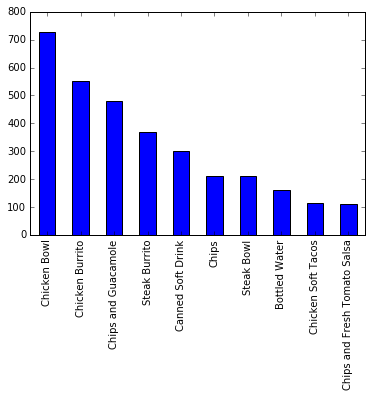

In [7]:
# In order for plot to appear within jupyter, use %matplotlib inline 
%matplotlib inline
df.item_name.value_counts()[:10].plot(kind='bar')

In [8]:
#Convert the item_price into float, after you remove the '$'
df['item_price'] = df['item_price'].str.replace('$','')
df['item_price'] = df['item_price'].astype(float)

print(df['item_price'])

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, dtype: float64


In [9]:
orders = df.groupby('order_id').sum()
print(orders.head())
orders['item_price'].describe()


          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70


count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [10]:
#Average number of items per order
#First, get the total number of items per order id
total_num_items = df.groupby('order_id')['quantity'].sum()
#print(total_num_items)
#Then calculate the average/mean
avg_num_items_per_order = total_num_items.mean()
print("Average number of items per order: %.2f")%(avg_num_items_per_order)

Average number of items per order: 2.71


In [11]:
#How many veggie/vegetarian-leaning items were ordered?
#use regexp to look for variations on the word "veg" in the item_name
veg = re.match("Veg",df['item_name'])
re.match()
print(veg)

TypeError: expected string or buffer